In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/brain_tumor_classification"
EXTRACTED_DATASET_DIR = os.path.join(ROOT_DIR, "extracted")
os.makedirs(EXTRACTED_DATASET_DIR, exist_ok=True)

In [ ]:
os.listdir(ROOT_DIR)

['brainTumorDataPublic_1766.zip',
 'brainTumorDataPublic_15332298.zip',
 'brainTumorDataPublic_7671532.zip',
 'brainTumorDataPublic_22993064.zip',
 'cvind.mat',
 'README.txt',
 'extracted']

In [ ]:
for x in os.listdir(ROOT_DIR):
  if x.endswith('zip'):
    with zipfile.ZipFile(os.path.join(ROOT_DIR, x), 'r') as zip_ref:
      zip_ref.extractall(EXTRACTED_DATASET_DIR)

In [ ]:
len(os.listdir(EXTRACTED_DATASET_DIR))

3064

In [ ]:
# LOOKING UP A SINGLE IMAGE
os.listdir(EXTRACTED_DATASET_DIR)[8]

'106.mat'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [ ]:
matfile = scipy.io.loadmat(os.path.join(EXTRACTED_DATASET_DIR, '106.mat'))

NotImplementedError: ignored

In [ ]:
import h5py

In [ ]:
file = h5py.File(os.path.join(EXTRACTED_DATASET_DIR, '106.mat'), 'r')
file.keys()

<KeysViewHDF5 ['cjdata']>

In [ ]:
for item in file['cjdata'].items():
  print(item)

('PID', <HDF5 dataset "PID": shape (6, 1), type "<u2">)
('image', <HDF5 dataset "image": shape (512, 512), type "<i2">)
('label', <HDF5 dataset "label": shape (1, 1), type "<f8">)
('tumorBorder', <HDF5 dataset "tumorBorder": shape (1, 52), type "<f8">)
('tumorMask', <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">)


In [ ]:
file['cjdata']['image']

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [ ]:
pid = file['cjdata']['PID']
image = file['cjdata']['image']
label = file['cjdata']['label']
tumorBorder = file['cjdata']['tumorBorder']
tumorMask = file['cjdata']['tumorMask']

In [ ]:
pid[0:5]

array([[49],
       [48],
       [56],
       [53],
       [49]], dtype=uint16)

In [ ]:
label[0][0]

1.0

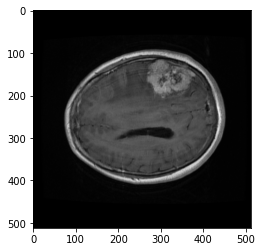

In [ ]:
img = np.array(image, dtype=np.float32)
plt.imshow(img, cmap='gray')

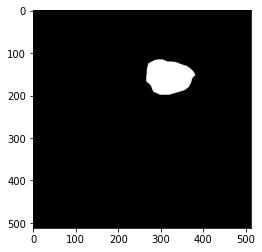

In [ ]:
mask = np.array(tumorMask, dtype=np.float32)
plt.imshow(mask, cmap='gray')

In [ ]:
print(img.shape)
print(mask.shape)
print(tumorBorder[0])

(512, 512)
(512, 512)
[151.8791691  267.45256072 138.56705069 268.05765702 125.25493229
 271.68823476 117.3886805  287.42073834 116.17848792 304.36343449
 121.01925825 315.86026402 121.01925825 324.3316121  122.83454712
 336.43353793 128.28041374 350.35075262 131.91099149 362.45267845
 137.35685811 369.71383394 141.59253215 374.55460427 146.43330248
 378.79027831 153.69445797 381.81575977 156.71993943 378.18518202
 160.95561347 374.55460427 170.63715413 372.13421911 180.92379108
 366.68835249 188.79004286 357.00681183 194.23590949 338.2488268
 199.07667982 321.91122694 199.68177611 299.52266416 191.81552432
 282.57996801 177.29321333 277.13410138 167.61167267 266.24236814
 154.90465056 266.24236814]


In [ ]:
x = []
y=[]
for i in range(len(tumorBorder[0])):
 if i%2==0: x.append(tumorBorder[0][i])
 else: y.append(tumorBorder[0][i])

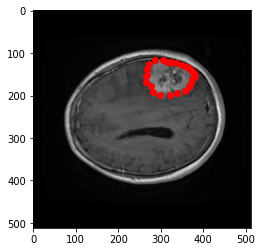

In [ ]:
plt.imshow(image, cmap='gray')
plt.scatter(y, x, c='r')

In [ ]:
PROCESSED_DATASET = os.path.join(ROOT_DIR, 'processed')
IMAGES_DIR = os.path.join(PROCESSED_DATASET, 'images')
MASKS_DIR = os.path.join(PROCESSED_DATASET, 'masks')
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(MASKS_DIR, exist_ok=True)

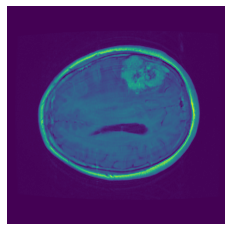

In [ ]:
labels = []
borders = []

file  1.mat processed
file  10.mat processed
file  100.mat processed
file  101.mat processed
file  102.mat processed
file  103.mat processed
file  104.mat processed
file  105.mat processed
file  106.mat processed
file  107.mat processed
file  108.mat processed
file  109.mat processed
file  11.mat processed
file  110.mat processed
file  111.mat processed
file  112.mat processed
file  113.mat processed
file  114.mat processed
file  115.mat processed
file  116.mat processed
file  117.mat processed
file  118.mat processed
file  119.mat processed
file  12.mat processed
file  120.mat processed
file  121.mat processed
file  122.mat processed
file  123.mat processed
file  124.mat processed
file  125.mat processed
file  126.mat processed
file  127.mat processed
file  128.mat processed
file  129.mat processed
file  13.mat processed
file  130.mat processed
file  131.mat processed
file  132.mat processed
file  133.mat processed
file  134.mat processed
file  135.mat processed
file  136.mat processe

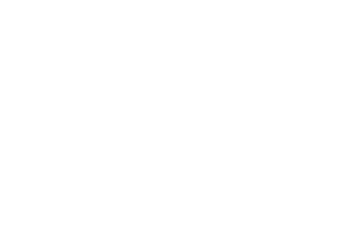

In [ ]:
for file in os.listdir(EXTRACTED_DATASET_DIR):
  with h5py.File(os.path.join(EXTRACTED_DATASET_DIR, file), 'r') as f:
    labels.append(int(f['cjdata']['label'][0][0]))
    borders.append(f['cjdata']['tumorBorder'][0])
    img = np.array(f['cjdata']['image'], dtype=np.float32)
    mask = np.array(f['cjdata']['tumorMask'], dtype=np.float32)
    plt.axis('off')
    plt.imsave(os.path.join(IMAGES_DIR, file.split('.')[0]+'.jpg'), img, cmap='gray')
    plt.imsave(os.path.join(MASKS_DIR, file.split('.')[0]+'.jpg'), mask, cmap='gray')
  print('file ', file, 'processed')

In [ ]:
borders[0]

array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
       289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
       318.72232305, 249.9600726 , 321.50998185, 237.88021779,
       354.96188748, 234.16333938, 367.97096189, 227.65880218,
       380.9800363 , 210.93284936, 372.61705989, 195.13611615,
       363.32486388, 177.48094374, 350.31578947, 176.55172414,
       336.37749546, 183.98548094, 317.79310345, 196.06533575,
       305.71324864, 207.21597096, 295.49183303, 217.43738657,
       288.98729583, 222.08348457, 273.19056261, 223.94192377,
       268.54446461, 228.58802178])

In [ ]:
print(len(labels))
print(len(borders))

3064
3064


In [ ]:
import pickle

In [ ]:
pickle_file = open(os.path.join(PROCESSED_DATASET, 'lables.pickle'), "wb")
pickle.dump(np.array(labels, dtype = np.int8), pickle_file)
pickle_file.close()

In [ ]:
pickle_file = open(os.path.join(PROCESSED_DATASET, 'borders.pickle'), "wb")
pickle.dump(np.array(borders), pickle_file)
pickle_file.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
import PIL
import cv2
import matplotlib.image as mpimp

In [ ]:
training_data = []

In [ ]:
for image in os.listdir(IMAGES_DIR):
  img = cv2.imread(os.path.join(IMAGES_DIR, image), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  with h5py.File(os.path.join(EXTRACTED_DATASET_DIR, image[:-3]+'mat'), 'r') as f:
    label = (int(f['cjdata']['label'][0][0]))
  training_data.append([img, label])

In [94]:
pickle_file = open(os.path.join(PROCESSED_DATASET, 'training.pickle'), "wb")
pickle.dump(training_data, pickle_file)
pickle_file.close()